<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Защита персональных данных клиентов

<b>Цели проекта:</b>  
Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию  
  
<b>Задачи проекта:</b>  
1. провести предобработку данных;
2. разбить данные на выборки;  
3. ответить на вопрос: "Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?";
4. предложить алгоритм преобразования данных для решения задачи;  
5. запрограммировать алгоритм, применив матричные операции.

<b>Данные:</b>  
Данные клиентов страховой компании «Хоть потоп»  
  
<b>Описание данных:</b>  
**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.  
**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
# импортировать библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# записать файл в data
try: 
    data = pd.read_csv('/datasets/insurance.csv', sep=',')
except:
    data = pd.read_csv('insurance.csv', sep=',')

In [3]:
# открыть файл
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
# изучить файл: метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Столбец <code>Возраст</code> в исходном датасете имеет тип <i>float</i>, хотя должно быть <i>int</i>, так как возраст - целое число.

In [5]:
# изменить тип данных
data['Возраст'] = data['Возраст'].astype('int')

# проверить, что тип данных изменился на int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int64  
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [6]:
# изучение данных: метод describe()
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Аномальных значений не обнаружено.

In [7]:
# поиск дубликатов
print(data.duplicated().sum())

153


Видим, что в данных есть дубликаты. Избавимся от повторяющихся строк.

In [8]:
# удалить дубликаты
data = data.drop_duplicates()

# проверить, что дубликатов нет
print(data.duplicated().sum())

0


Проверим данные на мультиколлинеарность.

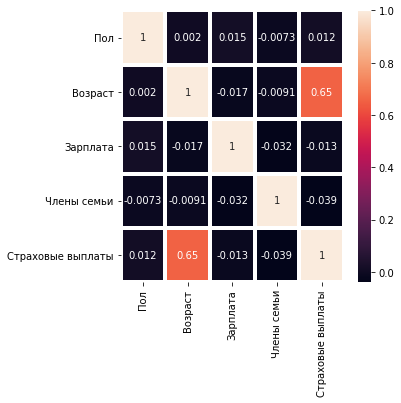

In [9]:
# проверить на мультиколлинеарность
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(data.corr(), annot=True, linewidths=3, linecolor='white')
plt.show()

Значительных зависимостей нет.

In [10]:
# определить размер data
data.shape

(4847, 5)

In [11]:
# выделить признаки
features = data.drop(['Страховые выплаты'],axis=1)
target = data['Страховые выплаты']

In [12]:
# разделить данные на выборки
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=12345)

<b>ИТОГИ</b>
1. Импортированы библиотеки и открыт файл.
2. Изучен файл выводом первых 10 строк.
3. Изучен файл методом <i>info()</i>.
4. Удалены дубликаты.
5. Тип данных в <code>Возраст</code> изменён на <i>int</i>. 
6. Аномальных значений в данных не найдено. 
7. Выделены признаки, данные разделены на тестовую и обучающую выборки.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении исходных данных на обратимую матрицу качество линейной регресси не изменяется.

**Обоснование:**  
  
Новая матрица признаков, домноженная на обратимую матрицу, 
$X' = XP$, тогда  
  
предсказания:  
$$a = X'w'$$  
  
формула обучения:  
$$w' = (X'^T X')^{-1}X'^T y$$
  
Произведём обратную замену, раскроем скобки и воспользуемся свойством $(AB)^T = B^T A^T$:  
$$w' = ((XP)^T (XP))^{-1}(XP)^T y = (P^T X^T XP)^{-1}P^T X^T y$$  
  
Раскроем скобки, воспользовавшись свойством $(AB)^{-1} = B^{-1} A^{-1}$  
$$w' = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^T y$$  
  
Мы знаем, что умножение матрицы на свою обратную - есть единичная матрица ($P P^{-1} = E$), поэтому $(P^T)^{-1} P^T = E$, следовательно
$$w' = P^{-1}(X^T X)^{-1}E X^T y$$
  
При умножении матрицы на единичную матрицу получается та же самая матрица, поэтому    
$$w' = P^{-1}(X^T X)^{-1} X^T y$$
  
Получается, что $w' = P^{-1}w$, тогда $a = X' P^{-1}w$  
  
Сделаем обратную замену, тогда $a = XPP^{-1}w$  
  
Помним, что умножение матрицы на свою обратную - есть единичная матрица ($P P^{-1} = E$), поэтому получаем, что $a = Xw$

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу размером 4х4. Необходимо создать модель линейной регрессии до преобразования и посчитать метрику R2. Далее умножить исходные признаки на обратимую матрицу и на основе полученных значений снова посчитать метрику R2. Метрики R2 по итогу должны быть равны.

**Обоснование**  
  
В пункте 2 было доказано, что домножение признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому результаты R2 должны оказаться равны

## Проверка алгоритма

In [13]:
# создать класс LinearRegression
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [14]:
# обучить модель
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(test_features)

# вывести метрику R2
print(r2_score(test_target, predictions))

0.4230772749214825


In [15]:
test_features.shape

(1212, 4)

In [16]:
# создать обратимую матрицу
matrix = np.random.normal(3, size=(4,4))
matrix

array([[2.44267638, 3.7548587 , 2.80575924, 3.84565701],
       [3.61288494, 3.41852931, 4.08174311, 3.31520103],
       [3.27668734, 2.60179959, 1.87608753, 2.10253155],
       [4.24030992, 4.07591922, 4.76962432, 4.08464146]])

In [17]:
# проверить, что матрица обратимая
try:
    matrix_1 = np.linalg.inv(matrix)
    print('Матрица является обратимой')
    print()
    print(matrix_1)
except:
    print('Матрица не является обратимой')

Матрица является обратимой

[[-0.57767709 -3.04627302  0.57294018  2.7213969 ]
 [ 1.11991771  9.31141243  0.12791949 -8.6776229 ]
 [-0.11713857  2.34527614 -0.53321279 -1.51873559]
 [-0.38105113 -8.86773284 -0.09979058  7.85222452]]


In [18]:
# умножить обратимую матрицу на признаки
train_matrix = train_features.dot(matrix)
test_matrix = test_features.dot(matrix)

print(train_matrix)
print(test_matrix)

                  0              1              2              3
4599  178689.101257  141901.948373  102370.598179  114688.964629
3882  166272.020593  132048.974159   95280.319149  106732.257748
4705   91838.194981   72936.509173   52633.182164   58954.532990
1400  127305.274262  101110.495011   72984.037904   81734.038761
728   106641.094155   84699.303802   61140.883918   68468.968202
...             ...            ...            ...            ...
3592   92492.362239   73457.205420   53007.123686   59375.569757
3586  110536.990110   87787.278018   63351.371517   70958.854057
2211   94775.204720   75268.209546   54308.139724   60837.396242
3653  127261.376860  101070.466379   72934.468884   81695.556245
4722  155143.919936  123213.432198   88915.830658   99593.835050

[3635 rows x 4 columns]
                  0              1              2              3
1335  154745.181330  122887.321732   88648.017040   99319.584650
3875  216051.750494  171571.740849  123767.589449  138666.761527


In [19]:
# обучить модель
model = LinearRegression()
model.fit(train_matrix, train_target)
predictions = model.predict(test_matrix)

# вывести метрику R2
print(r2_score(test_target, predictions))

0.4230778729238678


<b>ИТОГИ</b>  
Метрики R2 обеих моделей одиннаковые, следовательно, умножение исходных данных на случайную обратимую матрицу может быть применено для их шифрования.

## Общие выводы

1. <b>Изучен файл</b>  
    - Пропусков в данных не обноружено.  
    - Тип данных в <code>Возраст</code> изменён на <i>int</i>.  
    - Аномальных значений в данных не найдено.  
    - Удалены дубликаты.
2. <b>Данные разбиты на выборки</b> 
    - Данные были разбиты на две выборки: обучающая и тренировочная в отношении 4:1 соответственно.  
3. <b>Доказано, что при умножении исходных данных на обратимую матрицу качество линейной регресси не изменяется.</b> 
4. <b>Предложен алгоритм преобразования</b>